# 高斯和贝叶斯理论



In [1]:
%matplotlib inline

In [2]:
#format the book
import book_format
book_format.set_style()

# 概要

上一章结束时讨论了离散贝叶斯滤波器的一些缺点。对于许多跟踪和过滤问题，我们希望有一个*单峰*且*连续*的滤波器。也就是说，我们想要使用浮点数进行建模（连续），并且只有一个信念被表示（单峰）。例如，我们希望表示一架飞机位于（12.34，-95.54，2389.5），分别对应着纬度、经度和海拔高度。我们不希望我们的滤波器告诉我们：“它可能在（1.65，-78.01，2100.45）或者可能在（34.36，-98.23，2543.79）”。这与我们对世界运作方式的直觉不符合，正如我们所讨论的，计算多模态情况可能代价高昂。当然，多个位置估计会使导航变得不可能。

我们希望有一种单峰、连续的概率表示方式，能够模拟真实世界的运作方式，并且在计算上具有高效性。高斯分布提供了所有这些特征。

# 均值（Mean）、方差（Variance）和标准差（Standard Deviation）

大多数人可能接触过统计学，但还是让我讲解这些内容吧。我请求你们阅读这部分内容，即使你们对此很熟悉。我有两个原因这么要求。首先，我希望确保我们对术语的使用方式是一致的。其次，我致力于形成对统计学的直观理解，这将在以后的章节中为你们提供帮助。在学习统计课程时，很容易只记住公式和计算，但对所学内容的含义可能不够清晰。

# 随机变量

每次掷骰子时，*结果*会在1到6之间。如果我们投掷一个公平的骰子一百万次，我们预期得到1的次数将占到1/6。因此，我们说结果为1的*概率*或*可能性*是1/6。同样，如果我问你下一次投掷得到1的机会是多少，你会回答1/6。

这种数值和相关概率的组合被称为[*随机变量*](https://en.wikipedia.org/wiki/Random_variable)。这里的“随机”并不意味着过程是不确定的，只是我们缺乏有关结果的信息。掷骰子的结果是确定的，但我们没有足够的信息来计算结果。我们不知道会发生什么，只能用概率来描述。

在我们定义术语的同时，数值范围被称为[*样本空间*](https://en.wikipedia.org/wiki/Sample_space)。对于骰子来说，样本空间是{1, 2, 3, 4, 5, 6}。对于硬币来说，样本空间是{H, T}。*空间*是一个数学术语，表示带有结构的集合。对于骰子来说，样本空间是自然数1到6之间的一个子集。

另一个随机变量的例子是大学生的身高。这里的样本空间是生物学定义的两个极限之间的一系列实数值。

像硬币投掷和骰子掷这样的随机变量是*离散随机变量*。这意味着它们的样本空间由有限数量的值或可数无限数量的值表示，例如自然数。人类的身高称为*连续随机变量*，因为它们可以在两个限定之间取任何实数值。

不要混淆随机变量的*测量*与实际值。如果我们只能测量一个人的身高到0.1米，那么我们只能记录0.1、0.2、0.3...2.7等值，得到27个离散选择。尽管如此，一个人的身高可以在这些范围内的任意实数值之间变化，因此身高是一个连续随机变量。

在统计学中，通常使用大写字母来表示随机变量，通常是从字母表的后半部分选取。因此，我们可能会说$X$是代表骰子掷出结果的随机变量，或者$Y$代表新生诗歌课学生的身高。在后面的章节中，我们将使用线性代数来解决这些问题，因此我们将遵循使用小写字母表示向量和大写字母表示矩阵的约定。不幸的是，这些约定有时会冲突，你需要根据上下文来确定作者使用的约定。我总是用粗体符号表示向量和矩阵，这有助于区分两者。

# 概率分布

概率分布给出随机变量在样本空间中取任何值的概率。例如，对于一个公平的六面骰子，我们可能会说：

|Value|Probability|
|-----|-----------|
|1|1/6|
|2|1/6|
|3|1/6|
|4|1/6|
|5|1/6|
|6|1/6|

我们用小写的 p 表示这个分布：$p(x)$。使用普通的函数表示法，我们会写成：

$$P(X{=}4) = p(4) = \frac{1}{6}$$

这表示骰子落在 4 的概率是 $\frac{1}{6}$。$P(X{=}x_k)$ 表示“$X$ 等于 $x_k$ 的概率”。注意微妙的符号差异。大写的 $P$ 表示单个事件的概率，而小写的 $p$ 是概率分布函数。如果你不够细心可能会被误导。一些文本使用 $Pr$ 而不是 $P$ 来解决这个问题。

另一个例子是一个公平的硬币。它的样本空间是 {H, T}。硬币是公平的，所以正面（H）的概率是 50%，反面（T）的概率也是 50%。我们写成：

$$\begin{gathered}P(X{=}H) = 0.5\\P(X{=}T)=0.5\end{gathered}$$

样本空间并不是唯一的。一个骰子的一个样本空间是 {1, 2, 3, 4, 5, 6}。另一个有效的样本空间可能是 {偶数, 奇数}。另一个可能是 {四角都有点, 四角没有点}。一个样本空间是有效的，只要它覆盖了所有可能性，并且任何单个事件只由一个元素描述。{偶数, 1, 3, 4, 5} 不是一个骰子的有效样本空间，因为值 4 同时被 '偶数' 和 '4' 匹配。

*离散随机值* 所有值的概率称为 *离散概率分布*，*连续随机值* 所有值的概率称为 *连续概率分布*。

要成为概率分布，每个值 $x_i$ 的概率必须为 $x_i \ge 0$，因为没有概率可以小于零。其次，所有值的概率之和必须等于一。对于硬币投掷来说，这个要求在直觉上是明确的：如果得到正面的概率是 70%，那么得到反面的概率就必须是 30%。我们将这个要求规范化为

$$\sum\limits_u P(X{=}u)= 1$$

对于离散分布，以及

$$\int\limits_u P(X{=}u) \,du= 1$$

对于连续分布。

在前一章中，我们使用概率分布来估计走廊上狗的位置。例如：

sum =  1.0


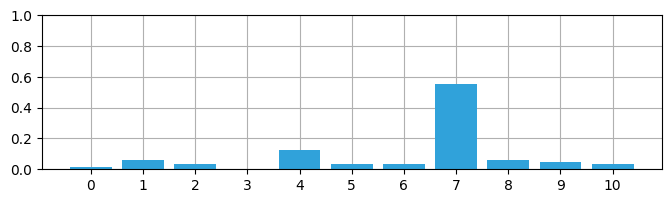

In [3]:
import numpy as np
import kf_book.book_plots as book_plots

belief = np.array([1, 4, 2, 0, 8, 2, 2, 35, 4, 3, 2])
belief = belief / np.sum(belief)
with book_plots.figsize(y=2):
    book_plots.bar_plot(belief)
print('sum = ', np.sum(belief))


每个位置的概率在 0 和 1 之间，所有概率的总和为一，因此这使它成为一个概率分布。每个概率都是离散的，所以我们可以更精确地称之为离散概率分布。在实践中，除非有特殊理由要做出区分，我们通常不区分离散和连续的术语。

# 随机变量的平均值、中位数和众数

当我们有一组数据时，通常希望知道该组数据的代表性或平均值。有许多用于表示这一概念的度量标准，这个概念被称为[*中心趋势的度量*](https://en.wikipedia.org/wiki/Central_tendency)。例如，我们可能想知道一个班级学生的*平均*身高。我们都知道如何计算一组数据的平均值，但让我详细说明一下，以介绍更正式的符号和术语。另一个代表平均值的词是*均值*。我们通过对数值求和然后除以数值的个数来计算均值。如果学生的身高以米为单位是

$$X = \{1.8, 2.0, 1.7, 1.9, 1.6\}$$

我们计算均值为

$$\mu = \frac{1.8 + 2.0 + 1.7 + 1.9 + 1.6}{5} = 1.8$$

传统上用符号 $\mu$（mu）表示均值。

我们可以用方程式表示这个计算

$$ \mu = \frac{1}{n}\sum^n_{i=1} x_i$$

NumPy 提供了 `numpy.mean()` 来计算均值。

In [5]:
x = [1.8, 2.0, 1.7, 1.9, 1.6]
np.mean(x)

x = np.array([1.8, 2.0, 1.7, 1.9, 1.6])
x.mean()

1.8

一组数字的*众数*是出现次数最多的数字。如果只有一个数字出现最多次，我们称其为*单峰*集合，如果有两个或两个以上的数字出现的频率相等最多次数，则该集合是*多峰*的。例如，集合 {1, 2, 2, 2, 3, 4, 4, 4} 的众数是 2 和 4，因此是多峰的；而集合 {5, 7, 7, 13} 的众数是 7，因此是单峰的。在本书中，我们不会用这种方式计算众数，但我们会以更一般的方式使用单峰和多峰的概念。例如，在**离散贝叶斯**章节中，我们将狗的位置的信念描述为*多峰分布*，因为我们对不同位置分配了不同的概率。

最后，一组数字的*中位数*是这组数字的中间点，使得一半的值在中位数下方，另一半在中位数上方。这里的上下是指相对于排序后的集合。如果集合包含偶数个值，则中间的两个数字取平均值。

Numpy 提供了 `numpy.median()` 来计算中位数。可以看到 {1.8, 2.0, 1.7, 1.9, 1.6} 的中位数是 1.8，因为排序后该集合中的第三个元素是 1.8。在这种情况下，中位数等于均值，但这并不是普遍的情况。

In [6]:
np.median(x)

1.8

# 随机变量的期望

随机变量的[*期望值*](https://en.wikipedia.org/wiki/Expected_value)是指该变量无限次取样后求得的平均值。假设我们有 $x=[1,3,5]$，每个值的概率相等。那我们预期 $x$ 的平均值是多少呢？

很明显，这将是 1、3 和 5 的平均值，即 3。这是合理的；我们期望 1、3 和 5 出现的次数是相等的，所以 $(1+3+5)/3=3$ 显然是这无限次采样序列的平均值。换句话说，这里的期望值就是样本空间的*均值*。

现在假设每个值发生的概率不同。比如说，1 的发生概率是 80%，3 的是 15%，而 5 的是 5%。在这种情况下，我们通过将 $x$ 的每个值乘以其发生的百分比，然后将结果求和来计算期望值。对于这个例子，我们可以计算：

$$\mathbb E[X] = (1)(0.8) + (3)(0.15) + (5)(0.05) = 1.5$$

这里我引入了符号 $\mathbb E[X]$ 表示 $x$ 的期望值。有些文献使用 $E(x)$。$x$ 的值为 1.5 是合乎直觉的，因为 $x$ 更有可能是 1，而 3 比 5 更有可能发生。

我们可以通过让 $x_i$ 表示 $X$ 的第 $i$ 个值，$p_i$ 表示其发生的概率来形式化表示：

$$\mathbb E[X] = \sum_{i=1}^n p_ix_i$$

一个微不足道的代数事实表明，如果概率都相等，期望值等同于均值：

$$\mathbb E[X] = \sum_{i=1}^n p_ix_i = \frac{1}{n}\sum_{i=1}^n x_i = \mu_x$$

如果 $x$ 是连续的，我们会用积分来代替求和，如下所示：

$$\mathbb E[X] = \int_{a}^b\, xf(x) \,dx$$

其中 $f(x)$ 是 $x$ 的概率分布函数。虽然我们现在不会使用这个公式，但我们将在下一章节中使用它。

我们可以编写一小段 Python 代码来模拟这个过程。这里我进行了 100 万次采样，并计算了我们刚刚解析得到的分布的期望值。

In [7]:
total = 0
N = 1000000
for r in np.random.rand(N):
    if r <= .80: total += 1
    elif r < .95: total += 3
    else: total += 5

total / N

1.499754

### 练习

掷骰子的期望值是多少？

### 解答

每一面都有相同的可能性，所以每一面的概率都是1/6。因此
$$\begin{aligned}
\mathbb E[X] &= 1/6\times1 + 1/6\times 2 + 1/6\times 3 + 1/6\times 4 + 1/6\times 5 + 1/6\times6 \\
&= 1/6(1+2+3+4+5+6)\\&= 3.5\end{aligned}$$

### 练习

给定均匀连续分布

$$f(x) = \frac{1}{b - a}$$

计算$a=0$和$b=20$时的期望值。

### 解答

$$\begin{aligned}
\mathbb E[X] &= \int_0^{20}\, x\frac{1}{20} \,dx \\
&= \bigg[\frac{x^2}{40}\bigg]_0^{20} \\
&= 10 - 0 \\
&= 10
\end{aligned}$$


# 随机变量的方差

上面的计算告诉我们学生们的平均身高，但这并不是我们想要了解的全部内容。例如，假设我们有三个班级的学生，我们标记为 $X$、$Y$ 和 $Z$，他们的身高分别是：

In [10]:
X = [1.8, 2.0, 1.7, 1.9, 1.6]
Y = [2.2, 1.5, 2.3, 1.7, 1.3]
Z = [1.8, 1.8, 1.8, 1.8, 1.8]

使用 NumPy，我们可以看到每个班级的平均身高是相同的。

In [11]:
print(np.mean(X), np.mean(Y), np.mean(Z))

1.8 1.8 1.8


每个班级的平均身高都是1.8米，但是请注意第二个班级的学生身高变化比第一个班级大得多，而第三个班级则完全没有变化。

平均值告诉了我们一些关于数据的信息，但并不是全部。我们希望能够指定学生身高之间的 *变化* 有多大。你可以想象到许多原因。也许某个学区需要订购5000张桌子，他们想要确保所购买的桌子能够适应学生身高的范围。

统计学已经将这种测量变化的概念正式化为[*标准差*](https://en.wikipedia.org/wiki/Standard_deviation)和[*方差*](https://en.wikipedia.org/wiki/Variance)。计算方差的公式是：

$$\mathit{VAR}(X) = \mathbb  E[(X - \mu)^2]$$

暂时忽略平方项，你可以看到方差是样本空间 $X$ 与平均值 $\mu$ 之间变化的*期望值*：($X-\mu$)。稍后我会解释平方项的目的。期望值的公式是 $\mathbb E[X] = \sum\limits_{i=1}^n p_ix_i$，所以我们可以将其代入上述方程得到：

$$\mathit{VAR}(X) = \frac{1}{n}\sum_{i=1}^n (x_i - \mu)^2$$

让我们计算三个班级的方差，看看我们得到了什么值，并熟悉一下这个概念。

$X$ 的平均值是1.8（$\mu_x = 1.8$），所以我们计算

$$ 
\begin{aligned}
\mathit{VAR}(X) &=\frac{(1.8-1.8)^2 + (2-1.8)^2 + (1.7-1.8)^2 + (1.9-1.8)^2 + (1.6-1.8)^2} {5} \\
&= \frac{0 + 0.04 + 0.01 + 0.01 + 0.04}{5} \\
\mathit{VAR}(X)&= 0.02 \, m^2
\end{aligned}$$

NumPy 提供了 `var()` 函数来计算方差：

In [12]:
print(f"{np.var(X):.2f} meters squared")

0.02 meters squared


这段描述中有些难以理解。身高单位是米，而方差的单位是米的平方。因此，我们使用更常见的度量单位——*标准差*，它被定义为方差的平方根：

$$\sigma = \sqrt{\mathit{VAR}(X)}=\sqrt{\frac{1}{n}\sum_{i=1}^n(x_i - \mu)^2}$$

通常用 $\sigma$ 表示 *标准差*，用 $\sigma^2$ 表示 *方差*。在本书的大部分内容中，我会使用 $\sigma^2$ 而不是 $\mathit{VAR}(X)$ 表示方差；它们表示的是同一个概念。

我们用以下公式计算第一个班级的标准差：

$$ 
\begin{aligned}
\sigma_x &=\sqrt{\frac{(1.8-1.8)^2 + (2-1.8)^2 + (1.7-1.8)^2 + (1.9-1.8)^2 + (1.6-1.8)^2} {5}} \\
&= \sqrt{\frac{0 + 0.04 + 0.01 + 0.01 + 0.04}{5}} \\
\sigma_x&= 0.1414
\end{aligned}$$

我们可以使用 NumPy 中的 `numpy.std()` 方法来验证这个计算，该方法用于计算标准差。 'std' 是标准差的常见缩写。

In [13]:
print(f"std {np.std(X):.4f}")
print(f"var {np.std(X)**2:.4f}")

std 0.1414
var 0.0200


当然，$0.1414^2 = 0.02$，这与我们之前计算的方差相符。

标准差代表了什么？它告诉我们身高在自身之间的变化程度。"变化程度" 不是一个数学术语。我们将在下一节引入高斯概念后能更准确地定义它。现在，我可以说对于很多事物，大约有68%的数值位于平均值加减一个标准差的范围内。换句话说，对于一个随机的班级，68%的学生身高会在1.66米（1.8-0.1414）和1.94米（1.8+0.1414）之间。

我们可以用图表来展示这一点：

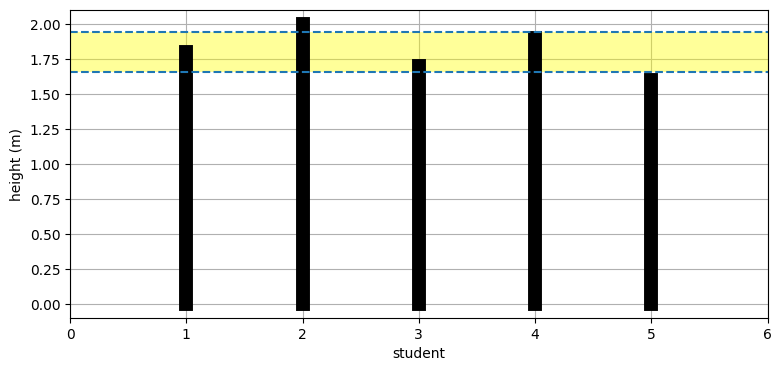

In [14]:
from kf_book.gaussian_internal import plot_height_std
import matplotlib.pyplot as plt

plot_height_std(X)

对于仅有5名学生来说，我们显然不会完全得到68%在一个标准差内的结果。我们可以看到5名学生中有3名在$\pm1\sigma$范围内，即60%，这是在仅有5个样本的情况下最接近68%的结果。让我们看看有100名学生的班级的结果。

> 我们将一个标准差写作$1\sigma$，念作是"一个标准差"，不是"一个西格玛"。两个标准差表示为$2\sigma$，以此类推。

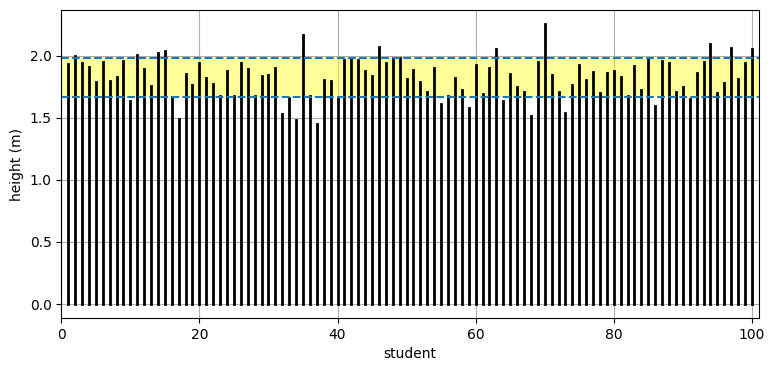

mean = 1.825
std  = 0.155


In [15]:
from numpy.random import randn
data = 1.8 + randn(100)*.1414
mean, std = data.mean(), data.std()

plot_height_std(data, lw=2)
print(f'mean = {mean:.3f}')
print(f'std  = {std:.3f}')

我们可以使用 Python 代码来计算在 100 名学生的班级中，身高在均值 1.8 的 $\pm1\sigma$ 范围内的百分比，以验证大约 68% 的身高是否在这个范围内。我来提供验证所需的代码。

In [ ]:
np.sum((data > mean-std) & (data < mean+std)) / len(data) * 100.

我们很快会更深入地讨论这个问题。现在让我们计算以下集合 $Y = [2.2, 1.5, 2.3, 1.7, 1.3]$ 的标准偏差。

集合 $Y$ 的均值是 $\mu=1.8$ 米，所以

$$ 
\begin{aligned}
\sigma_y &=\sqrt{\frac{(2.2-1.8)^2 + (1.5-1.8)^2 + (2.3-1.8)^2 + (1.7-1.8)^2 + (1.3-1.8)^2} {5}} \\
&= \sqrt{0.152} = 0.39 \ 米
\end{aligned}$$

我们将使用 NumPy 来验证这个结果。

In [17]:
print(f'std of Y is {np.std(Y):.2f} m')

std of Y is 0.39 m


这符合我们的预期。$Y$ 的身高变化较大，因此标准偏差较大。

最后，让我们计算一下 $Z$ 的标准偏差。因为数值都相同，我们预计标准偏差会是零。

$$ 
\begin{aligned}
\sigma_z &=\sqrt{\frac{(1.8-1.8)^2 + (1.8-1.8)^2 + (1.8-1.8)^2 + (1.8-1.8)^2 + (1.8-1.8)^2} {5}} \\
&= \sqrt{\frac{0+0+0+0+0}{5}} \\
\sigma_z&= 0.0 \ 米
\end{aligned}$$

In [18]:
print(np.std(Z))

0.0


在我们继续之前，我需要指出，我忽略了一个事实，那就是男性平均来说比女性更高。一般来说，只包含男性或女性的班级身高变异性会比混合性别班级小。其他因素也存在类似情况，比如营养良好的儿童比营养不良的儿童更高，斯堪的纳维亚人比意大利人更高。在设计实验时，统计学家需要考虑到这些因素。

我曾提到我们可能在进行这项分析来为学区订购课桌。每个年龄组可能会有两个不同的平均身高——一个以女性平均身高为中心，另一个以男性平均身高为中心。整个班级的平均身高可能会介于这两者之间。如果我们按照所有学生的平均身高购买课桌，很可能导致课桌既不适合男生也不适合女生！

在这本书中，我们不会考虑这些问题。如果你需要学习如何处理这些问题的技巧，请查阅任何标准的概率文献。

# 为什么在计算方差时要取差值的平方？

我可以进行很多数学解释，但我们简单来看一下。这里是一张图，显示了$X=[3,-3,3,-3]$的值相对于均值的分布情况。

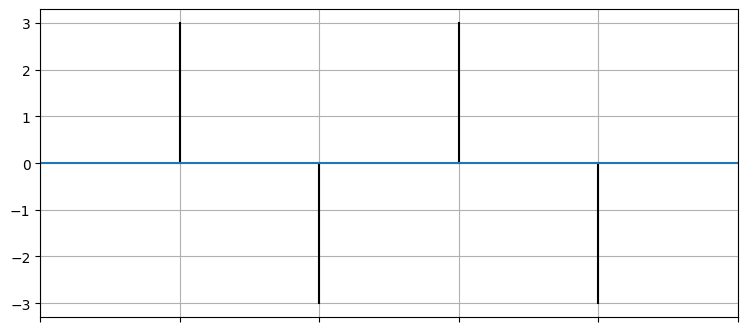

In [19]:
X = [3, -3, 3, -3]
mean = np.average(X)
for i in range(len(X)):
    plt.plot([i ,i], [mean, X[i]], color='k')
plt.axhline(mean)
plt.xlim(-1, len(X))
plt.tick_params(axis='x', labelbottom=False)

如果我们不对差值取平方，正负号会互相抵消，结果会变成：

$$\frac{(3-0) + (-3-0) + (3-0) + (-3-0)}{4} = 0$$

这显然是不正确的，因为数据中存在超过0的方差。

也许我们可以使用绝对值？我们可以通过观察看到结果是$12/4=3$，这肯定是正确的——每个值与均值的差值都是3。但是如果我们有$Y=[6, -2, -3, 1]$呢？在这种情况下，我们得到的结果也是$12/4=3$。$Y$明显比$X$更分散，但计算得到的方差却相同。如果我们使用平方的公式，对$Y$的方差计算结果是3.5，这反映了其更大的变化程度。

这并不是一个正确性的证明。事实上，技术发明者卡尔·弗里德里希·高斯也认识到这种方法在某种程度上是任意的。如果存在异常值，那么平方差会使得异常值的影响过大。例如，让我们看看如果数据是这样的时候会发生什么：

In [21]:
X = [1, -1, 1, -2, -1, 2, 1, 2, -1, 1, -1, 2, 1, -2, 100]
print(f'Variance of X with outlier    = {np.var(X):6.2f}')
print(f'Variance of X without outlier = {np.var(X[:-1]):6.2f}')

Variance of X with outlier    = 621.45
Variance of X without outlier =   2.03


这是否“正确”？由你来判断。去除异常值100后，我们得到 $\sigma^2=2.03$，这准确地反映了$X$在没有异常值的情况下的变化程度。一个异常值会对方差计算产生很大影响。我们是要让异常值影响计算结果以知晓其存在，还是要稳健地融合异常值，并且仍然给出接近去除异常值后数值的估计结果？这取决于你的问题需求。

我不会继续探讨这个问题；如果你感兴趣，可以看看詹姆斯·伯杰在*贝叶斯鲁棒性*领域所做的工作，或者彼得·J·胡伯（Peter J. Huber）在*稳健统计学*方面的出色出版物[4]。在这本书中，我们将始终使用高斯所定义的方差和标准差。

从中得到的要点是，这些“摘要”统计数据总是无法完整地展现我们数据的全部故事。以高斯定义的方差为例，它并不能告诉我们存在一个大的异常值。但是，它是一个强大的工具，因为我们可以用少量数字简洁地描述一个庞大的数据集。如果我们有10亿个数据点，我们不想通过肉眼检查图表或查看数字列表；摘要统计数据可以让我们有效地描述数据的形状。

# 高斯

我们现在准备学习[高斯分布](https://en.wikipedia.org/wiki/Gaussian_function)。让我们再次回顾一下本章的动机。

> 我们希望有一种单峰连续的概率表示方法，它能够模拟现实世界的运作方式，并且在计算上是高效的。

让我们看一下高斯分布的图表，以便对我们所讨论的内容有所了解。

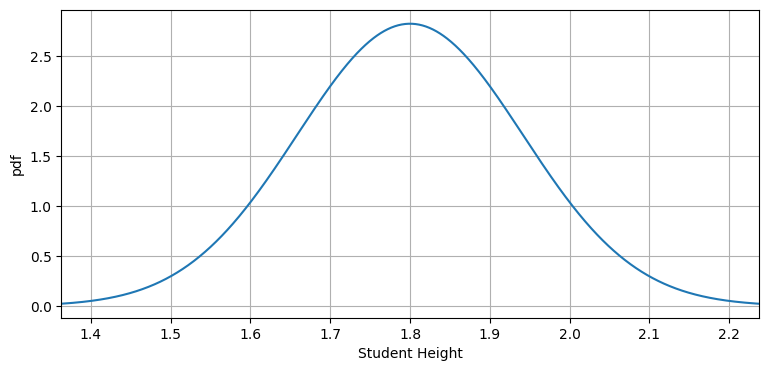

In [22]:
from filterpy.stats import plot_gaussian_pdf
plot_gaussian_pdf(mean=1.8, variance=0.1414**2, 
                  xlabel='Student Height', ylabel='pdf');

这个曲线是一个[*概率密度函数*](https://en.wikipedia.org/wiki/Probability_density_function)，简称为 *pdf*。它展示了随机变量取某个值的相对可能性。从图表中我们可以看出，学生身高接近1.8米的可能性比接近1.7米要高一些，而身高达到1.9米的可能性要远高于1.4米。换句话说，很多学生的身高接近1.8米，但身高为1.4米或2.2米的学生却很少。最后，请注意曲线是以均值1.8米为中心的。

> 我在Supporting_Notebooks文件夹中的 *Computing_and_Plotting_PDFs* 笔记本中详细解释了如何绘制高斯分布图表，还有更多内容。你可以在这里在线阅读 [链接](https://github.com/rlabbe/Kalman-and-Bayesian-Filters-in-Python/blob/master/Supporting_Notebooks/Computing_and_plotting_PDFs.ipynb) [1]。

这个曲线可能被你认出为‘钟型曲线’。这个曲线非常普遍，因为在真实世界的条件下，许多观察结果都是以这种方式分布的。我不会用‘钟型曲线’来指代高斯分布，因为许多概率分布都具有类似的钟型曲线形状。非数学的来源可能没有那么精确，所以在看到没有定义的术语时，要审慎判断你的结论。

这个曲线不仅仅出现在身高上——大量自然现象都表现出这种分布特征，包括我们在滤波问题中使用的传感器。正如我们将看到的，它具备我们所寻找的所有属性——它将单峰的信念或值表示为概率，它是连续的，而且在计算上是高效的。我们很快就会发现它还具有其他令人满意的特性，这些特性我们可能意识不到自己想要。

为了进一步激发你的兴趣，请回想一下*离散贝叶斯*章节中的概率分布形状。

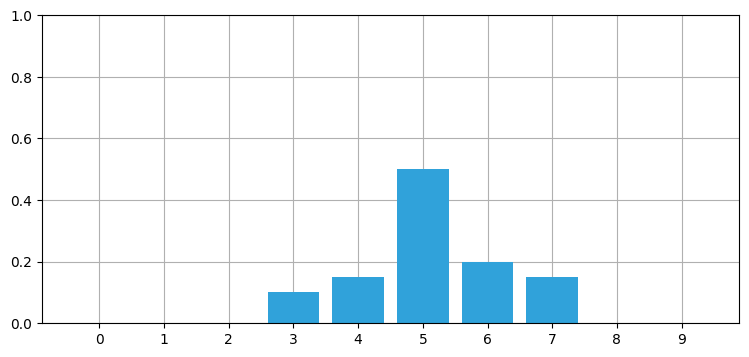

In [24]:
import kf_book.book_plots as book_plots
belief = [0., 0., 0., 0.1, 0.15, 0.5, 0.2, .15, 0, 0]
book_plots.bar_plot(belief)

它们并不是完美的高斯曲线，但它们相似。我们将使用高斯分布来替代上一章中使用的离散概率！

# 命名规范

在我们继续之前先了解一些命名规范 - 这张图表描述了一个*随机变量*在($-\infty..\infty$)范围内取任何值的*概率密度*。这是什么意思呢？想象我们对一段高速公路上的汽车速度进行无限次、无限精确度的测量。我们可以通过显示在任意速度下通过的汽车相对数量来绘制结果。如果平均速度是120公里每小时，可能会是这样的图表：

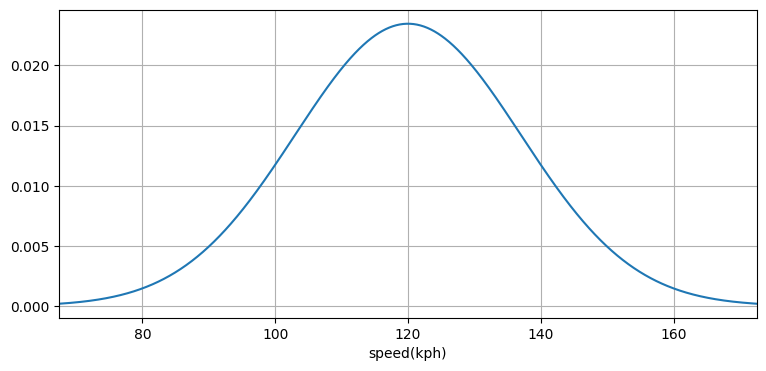

In [25]:
plot_gaussian_pdf(mean=120, variance=17**2, xlabel='speed(kph)');

纵轴表示*概率*——横轴表示*汽车速度*。我会在接下来的部分进一步解释这一点。

高斯模型并不完美。尽管这些图表没有显示出来，但分布的*尾部*延伸至无穷远。*尾部*是曲线的两端，在那里数值最低。当然，人类的身高或汽车的速度不可能小于零，更不用说$-\infty$或$\infty$了。上述的高斯分布模拟了测量到的汽车速度分布，但作为一个模型，它必然是不完美的。在这些滤波器中，模型和现实之间的差异会一次又一次地出现。高斯分布被广泛应用于许多数学分支，不是因为它们能完美地模拟现实，而是因为相对其他选择更容易使用。然而，即使在这本书中，高斯分布也无法完全模拟现实，迫使我们使用计算昂贵的替代方法。

你会听到这些分布被称为*高斯分布*或*正态分布*。在这个语境下，*高斯*和*正态*意思相同，并且可以互换使用。我会在整本书中使用这两个术语，因为不同的资料来源可能会使用其中任意一个术语，我希望你能习惯并认识到这两个术语。最后，就像这段文字所示，通常会简化名称并称之为*高斯*或*正态* — 这两个都是*高斯分布*的典型简称。

# 高斯分布

让我们探讨一下高斯分布是如何工作的。高斯分布是一个*连续概率分布*，完全由两个参数描述，即均值（$\mu$）和方差（$\sigma^2$）。它的定义如下：

$$ 
f(x, \mu, \sigma) = \frac{1}{\sigma\sqrt{2\pi}} \exp\big [{-\frac{(x-\mu)^2}{2\sigma^2} }\big ]
$$

这里的 $\exp[x]$ 表示的是 $e^x$。

<p> 如果你之前没有见过这个方程，不要被吓到；你不需要记住或操纵它。这个函数的计算存储在 `stats.py` 中，使用函数 `gaussian(x, mean, var, normed=True)` 调用。

去掉常数项后，你可以看到这是一个简单的指数函数：

$$f(x)\propto e^{-x^2}$$

它具有我们熟悉的钟型曲线形状。

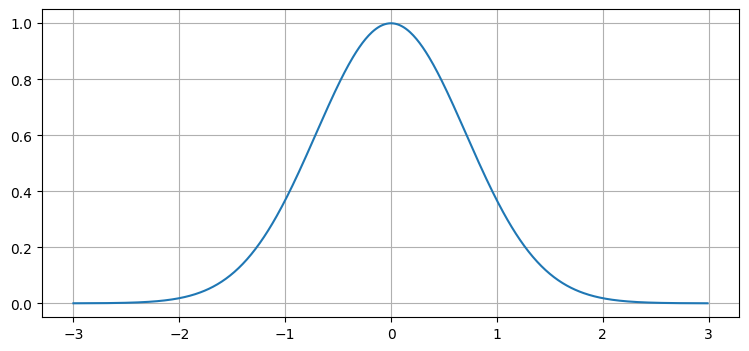

In [26]:
x = np.arange(-3, 3, .01)
plt.plot(x, np.exp(-x**2));

让我们回顾一下如何查看函数的代码。在一个单元格中，输入函数名，后面跟着两个问号，然后按下 CTRL+ENTER 键。这将打开一个弹出窗口显示函数的源代码。取消注释并尝试一下吧。

In [27]:
from filterpy.stats import gaussian
#gaussian??

让我们绘制一个均值为22 $(\mu=22)$，方差为4 $(\sigma^2=4)$ 的高斯分布曲线。

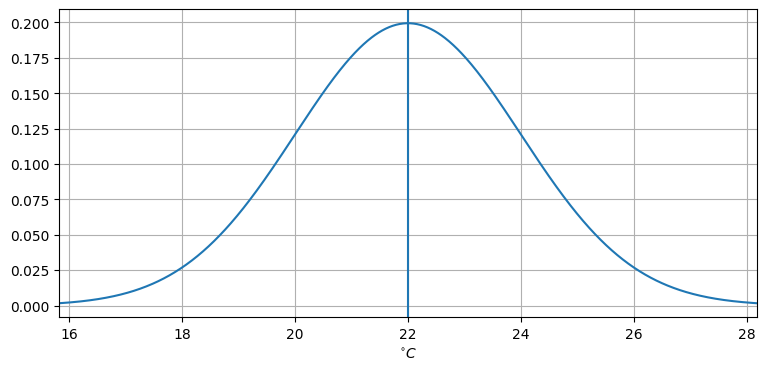

In [28]:
plot_gaussian_pdf(22, 4, mean_line=True, xlabel='$^{\circ}C$');

这条曲线代表什么意思呢？假设我们有一个温度计显示 22°C。没有温度计是完全准确的，所以我们预期每次读数都会略微偏离实际值。然而，一个被称为[*中心极限定理*](https://en.wikipedia.org/wiki/Central_limit_theorem)的定理指出，如果我们进行多次测量，这些测量值会呈现出正态分布。当我们看这张图表时，可以看到它与温度计读取实际温度为 22°C 的特定值的概率成比例。

要记住高斯分布是*连续的*。想象一个无限长的直线——随机选择一个点恰好在2这个位置的概率是多少呢？显然是0%，因为你有无限多的选择。对于正态分布也是一样的；在上面的图表中，恰好为2°C的概率是0%，因为温度读数可以有无限多个值。

这条曲线是什么呢？我们称之为*概率密度函数*。曲线下任何区域的面积给出了那些值的概率。因此，例如，如果计算曲线在20和22之间的面积，结果面积将是温度读数落在这两个温度之间的概率。

还有另一种理解方式。什么是岩石或海绵的*密度*？这是衡量物质在给定空间中的紧密程度。岩石密度大，海绵密度小。所以，如果你想知道一块岩石的重量，但又没有秤，你可以将其体积乘以密度。这将给出它的质量。在大多数物体中，密度在不同位置是不同的，所以你会对岩石的体积进行密度的积分。

$$M = \iiint_R p(x,y,z)\, dV$$

对于*概率密度*，我们做同样的事情。如果你想知道温度在20°C和21°C之间的概率，你会对以上曲线从20到21进行积分。因为你知道曲线的积分给出曲线下的面积。因为这是概率密度的曲线，密度的积分就是概率。

温度恰好为22°C的概率是多少？直觉上是0。这些都是实数，22°C 和 22.00000000000017°C 之间的可能性微乎其微。数学上，如果我们从22到22进行积分会得到什么？是零。

回到岩石的比喻，一个岩石上的单个点的重量是多少？一个无限小的点必然没有重量。问一个单个点的重量是没有意义的，也问一个连续分布的概率具有单一值也没有意义。对于这两者，答案显然是零。

在实际应用中，我们的传感器并不具有无限的精度，因此22°C的读数表示一个范围，比如22 ± 0.1°C，并且我们可以通过从21.9到22.1进行积分来计算该范围的概率。

我们可以从贝叶斯或频率学派的角度来思考这个问题。作为贝叶斯，如果温度计恰好显示22°C，那么我们的信念就由这条曲线描述——我们相信实际（系统）温度接近22°C的可能性非常高，而接近18°C的可能性非常低。作为频率学派，我们会说，如果我们对一个温度恰好为22°C的系统进行10亿次温度测量，那么测量结果的直方图将会呈现出这条曲线的形状。

要计算概率或曲线下的面积，你需要对高斯分布的方程进行积分

$$ \int^{x_1}_{x_0}  \frac{1}{\sigma\sqrt{2\pi}} e^{-\frac{1}{2}{(x-\mu)^2}/\sigma^2 } dx$$

这被称为*累积概率分布*，通常缩写为*cdf*。

我写了`filterpy.stats.norm_cdf`函数，可以帮你计算积分。例如，我们可以计算

In [29]:
from filterpy.stats import norm_cdf
print('Cumulative probability of range 21.5 to 22.5 is {:.2f}%'.format(
      norm_cdf((21.5, 22.5), 22,4)*100))
print('Cumulative probability of range 23.5 to 24.5 is {:.2f}%'.format(
      norm_cdf((23.5, 24.5), 22,4)*100))

Cumulative probability of range 21.5 to 22.5 is 19.74%
Cumulative probability of range 23.5 to 24.5 is 12.10%


均值（$\mu$）就是其字面意思——所有可能概率的平均值。由于曲线的对称形状，它也是曲线的最高点。温度计读数为22°C，因此这就是我们用作均值的数值。

对于随机变量 $X$ 的正态分布表示为 $X \sim\ \mathcal{N}(\mu,\sigma^2)$，其中 $\sim$ 表示*符合于*。这意味着我可以将我们温度计的读数表示为

$$\text{temp} \sim \mathcal{N}(22,4)$$

这是一个极其重要的结果。高斯分布让我用只有两个数字就能捕捉到无限多个可能的值！有了 $\mu=22$ 和 $\sigma^2=4$ 这两个数值，我就可以计算任何范围内的测量分布。

有些资料使用 $\mathcal N (\mu, \sigma)$ 而不是 $\mathcal N (\mu, \sigma^2)$。两种表示法都可以，它们都是惯例。如果你看到 $\mathcal{N}(22,4)$ 这样的术语，你需要记住使用的是哪种形式。在本书中，我总是使用 $\mathcal N (\mu, \sigma^2)$，所以对于这个例子，$\sigma=2$，$\sigma^2=4$。

# 方差与信念

由于这是一个概率密度分布，曲线下的面积总和必定等于一。这个道理直观上很清楚——曲线下的面积代表了所有可能的结果，*某件事*发生了，而*某件事发生*的概率为一，因此密度必须总和为一。我们可以通过一点代码来证明这一点。（如果你对数学有一定了解，可以对高斯方程从$-\infty$积分到$\infty$）

In [30]:
print(norm_cdf((-1e8, 1e8), mu=0, var=4))

1.0


这引出了一个重要的见解。如果方差很小，曲线将会很窄。这是因为方差是衡量样本与均值的变化程度的度量。为了使面积等于1，曲线必须变得很高。另一方面，如果方差很大，曲线就会很宽，因此为了使面积等于1，曲线也必须变得很矮。

让我们以图形的方式来看看这一点。我们将使用前面提到的 `filterpy.stats.gaussian`，它可以接受单个值或值数组。

In [31]:
from filterpy.stats import gaussian

print(gaussian(x=3.0, mean=2.0, var=1))
print(gaussian(x=[3.0, 2.0], mean=2.0, var=1))

0.24197072451914337
[0.378 0.622]


默认情况下，`gaussian`会对输出进行归一化处理，将输出转换回概率分布。可以使用参数`normed`来控制这一行为。

In [32]:
print(gaussian(x=[3.0, 2.0], mean=2.0, var=1, normed=False))

[0.242 0.399]


如果高斯函数没有经过归一化处理，就被称为*高斯函数*，而不是*高斯分布*。

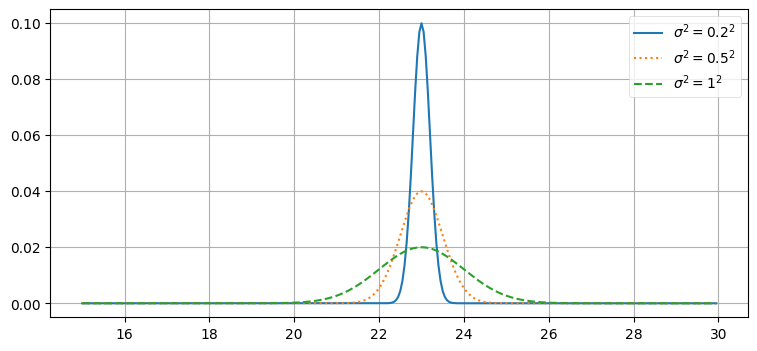

In [33]:
xs = np.arange(15, 30, 0.05)
plt.plot(xs, gaussian(xs, 23, 0.2**2), label='$\sigma^2=0.2^2$')
plt.plot(xs, gaussian(xs, 23, .5**2), label='$\sigma^2=0.5^2$', ls=':')
plt.plot(xs, gaussian(xs, 23, 1**2), label='$\sigma^2=1^2$', ls='--')
plt.legend();

这告诉我们什么呢？方差为$\sigma^2=0.2^2$的高斯曲线非常窄。这表示我们相信$x=23$，而且我们非常确信：在$\pm 0.2$个标准差内。相比之下，方差为$\sigma^2=1^2$的高斯曲线也认为$x=23$，但我们对此的确信度要低得多。我们对$x=23$的信念较弱，因此我们对$x$的可能值更为广泛——例如，我们认为$x=20$或$x=26$是相当可能的。对于$\sigma^2=0.2^2$，几乎可以完全排除$x=22$或$x=24$作为可能的值，而$\sigma^2=1^2$则认为它们几乎与$x=23$一样可能。

如果我们回想一下温度计，我们可以将这三条曲线看作来自三个不同温度计的读数。方差为$\sigma^2=0.2^2$表示一个非常精确的温度计，而方差为$\sigma^2=1^2$表示一个相对不太准确的温度计。请注意高斯分布提供给我们的非常强大的特性——我们可以仅用两个数字——均值和方差——完全表示温度计的读数和误差。

一个等价的高斯分布表达式是$\mathcal{N}(\mu,1/\tau)$，其中$\mu$是*均值*，$\tau$是*精度*。$1/\tau = \sigma^2$；它是方差的倒数。虽然我们在这本书中没有使用这种表述方式，但这强调了方差是我们数据精度的度量。小的方差意味着很大的精度——我们的测量非常精确。相反，大的方差意味着低的精度——我们的信念在一个很大的区域内波动。你应该习惯用这些等价的方式来思考高斯分布。在贝叶斯术语中，高斯分布反映了我们对测量的*信念*，它表达了测量的*精度*，并表示了测量中的*方差*有多大。这些都是表述同一事实的不同方式。

在接下来的章节中，我们将使用高斯分布来表达对我们正在追踪的物体的估计位置的信念，或者我们使用的传感器的准确性。

# 68-95-99.7 规则

这里值得花几句话来讲解标准差。标准差是衡量数据偏离均值程度的指标。对于高斯分布，68%的数据落在均值的一个标准差内（$\pm1\sigma$），95%落在两个标准差内（$\pm2\sigma$），99.7%落在三个标准差内（$\pm3\sigma$）。这通常被称为[68-95-99.7法则](https://en.wikipedia.org/wiki/68%E2%80%9395%E2%80%9399.7_rule)。如果你被告知一个班级的平均考试分数是71，标准差是9.4，如果分布是正态的话，你可以得出结论：95%的学生得分在52.2到89.8之间（这是通过计算得出的，$71 \pm (2 * 9.4)$）。

最后，这些并不是随意的数字。如果我们位置的高斯分布是$\mu=22$米，那么标准差也是以米为单位的。因此，$\sigma=0.2$意味着68%的测量范围在21.8到22.2米之间。方差是标准差的平方，因此$\sigma^2 = .04$米$^2$。就像你在上一节中看到的那样，写成$\sigma^2 = 0.2^2$可能会更有意义，因为0.2与数据的单位相同。

下图展示了标准差与正态分布之间的关系：

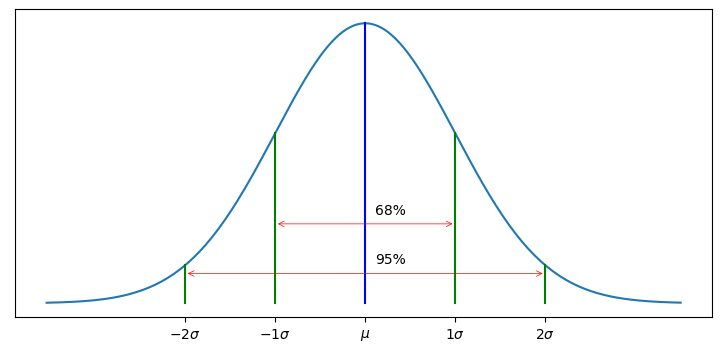

In [34]:
from kf_book.gaussian_internal import display_stddev_plot
display_stddev_plot()

#  交互式高斯

如果你正在 Jupyter Notebook 中阅读本文，这里有高斯分布图的交互式版本。使用滑块来调整 $\mu$ 和 $\sigma^2$。调整 $\mu$ 会左右移动图形，因为你在调整均值，而调整 $\sigma^2$ 则会使钟形曲线变粗或变细。

In [35]:
import math
from ipywidgets import interact, FloatSlider

def plt_g(mu,variance):
    plt.figure()
    xs = np.arange(2, 8, 0.01)
    ys = gaussian(xs, mu, variance)
    plt.plot(xs, ys)
    plt.ylim(0, 0.04)
    plt.show()

interact(plt_g, mu=FloatSlider(value=5, min=3, max=7),
         variance=FloatSlider(value = .03, min=.01, max=1.));

interactive(children=(FloatSlider(value=5.0, description='mu', max=7.0, min=3.0), FloatSlider(value=0.03, desc…

 最后，如果你在网上阅读这篇文章，这里有一个高斯分布的动画。首先，均值向右移动。然后将均值设定为 $\mu=5$ 并调整方差。
 
 <img src='animations/04_gaussian_animate.gif'>

# 高斯分布随机变量的计算性质

离散贝叶斯滤波通过乘法和加法处理任意概率随机变量。卡尔曼滤波器使用高斯而不是任意概率随机变量，但算法的其余部分保持不变。这意味着我们需要对高斯随机变量进行乘法和加法运算（高斯随机变量其实就是正态分布的随机变量）。

高斯随机变量的一个显著特性是，两个独立的高斯随机变量的和也是正态分布的！乘积不是高斯分布，但是与高斯分布成比例。因此我们可以说，两个高斯分布进行乘法得到的结果是一个高斯函数（需要注意，在这里“函数”表示数值总和为一的性质并不一定成立）。

Wikipedia上有一篇关于这个性质的很好的文章，我也会在本章末尾证明它：https://en.wikipedia.org/wiki/Sum_of_normally_distributed_random_variables

在我们进行数学推导之前，让我们通过可视化来测试这个性质。

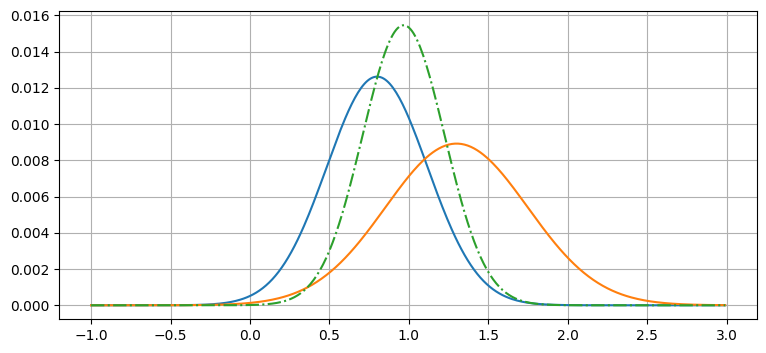

In [36]:
x = np.arange(-1, 3, 0.01)
g1 = gaussian(x, mean=0.8, var=.1)
g2 = gaussian(x, mean=1.3, var=.2)
plt.plot(x, g1, x, g2)

g = g1 * g2  # element-wise multiplication
g = g / sum(g)  # normalize
plt.plot(x, g, ls='-.');

这里我创建了两个高斯分布，g1=$\mathcal N(0.8, 0.1)$ 和 g2=$\mathcal N(1.3, 0.2)$ 并绘制了它们。然后我将它们相乘，并对结果进行了归一化。正如你所看到的，结果 *看起来* 像是一个高斯分布。

高斯分布是非线性函数。通常情况下，如果你将非线性方程相乘，最终得到的是不同类型的函数。例如，两个正弦函数相乘的形状与 `sin(x)` 的形状非常不同。

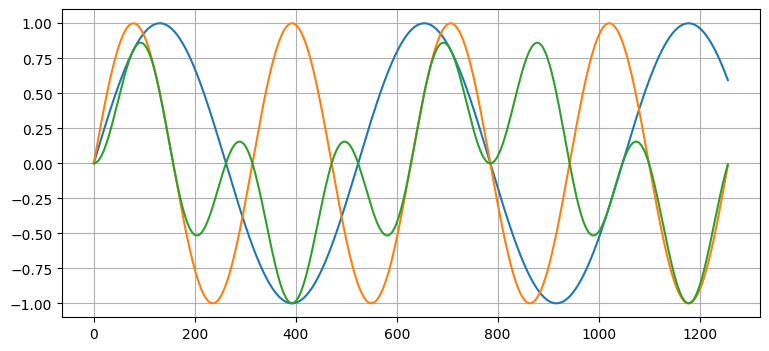

In [38]:
x = np.arange(0, 4*np.pi, 0.01)
plt.plot(np.sin(1.2*x))
plt.plot(np.sin(2*x))
plt.plot(np.sin(1.2*x) * np.sin(2*x));

两个独立高斯分布相乘的结果是一个高斯函数。这是为什么卡尔曼滤波器在计算上是可行的一个关键原因。换句话说，卡尔曼滤波器使用高斯函数 *因为* 它们在计算上很方便。

两个独立高斯分布相乘的结果为：

$$\begin{aligned}\mu &=\frac{\sigma_1^2\mu_2 + \sigma_2^2\mu_1}{\sigma_1^2+\sigma_2^2}\\
\sigma^2 &=\frac{\sigma_1^2\sigma_2^2}{\sigma_1^2+\sigma_2^2} 
\end{aligned}$$

两个高斯随机变量的和为

$$\begin{gathered}\mu = \mu_1 + \mu_2 \\
\sigma^2 = \sigma^2_1 + \sigma^2_2
\end{gathered}$$

在本章的最后，我推导了这些方程。然而，理解推导过程并不是非常重要。

# 汇总所有的内容

现在我们准备讨论高斯分布如何在滤波中使用。在下一章中，我们将使用高斯实现一个滤波器。这里我将解释为什么我们希望使用高斯。

在前一章中，我们用数组表示概率分布。我们通过计算该分布与表示每个点测量可能性的另一个分布的逐元素乘积来执行更新计算，就像这样：

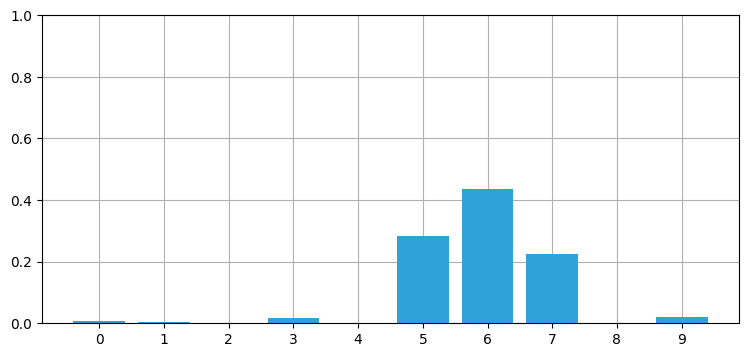

In [39]:
def normalize(p):
    return p / sum(p)

def update(likelihood, prior):
    return normalize(likelihood * prior)

prior =      normalize(np.array([4, 2, 0, 7, 2, 12, 35, 20, 3, 2]))
likelihood = normalize(np.array([3, 4, 1, 4, 2, 38, 20, 18, 1, 16]))
posterior = update(likelihood, prior)
book_plots.bar_plot(posterior)

对于一个具有多个维度的大型数组的实际滤波器，我们需要进行数十亿次乘法运算，以及大量的内存。换句话说，我们需要计算 10 次乘法才能得到这个结果。

但是，这个分布看起来像一个高斯分布。如果我们使用高斯分布代替数组会怎样呢？我将计算后验的均值和方差，并将其与条形图进行对比绘制。

mean: 5.88 var: 1.24


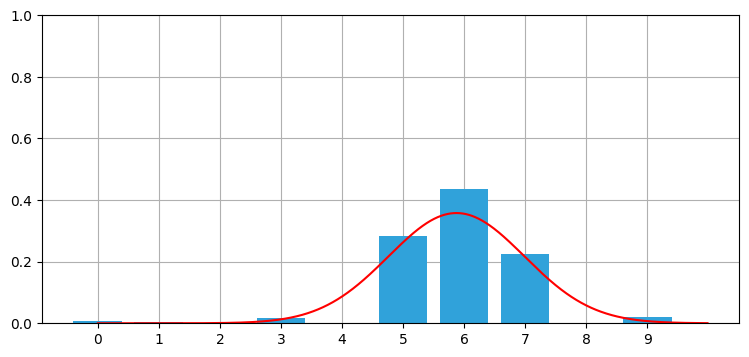

In [40]:
xs = np.arange(0, 10, .01)

def mean_var(p):
    x = np.arange(len(p))
    mean = np.sum(p * x,dtype=float)
    var = np.sum((x - mean)**2 * p)
    return mean, var

mean, var = mean_var(posterior)
book_plots.bar_plot(posterior)
plt.plot(xs, gaussian(xs, mean, var, normed=False), c='r');
print('mean: %.2f' % mean, 'var: %.2f' % var)

这令人印象深刻。我们可以用仅仅两个数来描述一整个数字分布。也许这个例子并不太有说服力，因为分布中只有 10 个数字。但是一个真实的问题可能有数百万个数字，却仍然只需要两个数字来描述它。

接下来，回想一下我们的滤波器使用以下更新函数：

```python
def update(likelihood, prior):
    return normalize(likelihood * prior)
```

如果数组包含一百万个元素，就需要进行一百万次乘法运算。然而，如果我们用高斯替换这些数组，我们只需进行以下计算：

$$\begin{aligned}\mu &=\frac{\sigma_1^2\mu_2 + \sigma_2^2\mu_1}{\sigma_1^2+\sigma_2^2}\\
\sigma^2 &=\frac{\sigma_1^2\sigma_2^2}{\sigma_1^2+\sigma_2^2} 
\end{aligned}$$

这只需三次乘法和两次除法。

# 贝叶斯理论

上一章，我们通过推理每一时刻我们所拥有的信息，将其表达为离散的概率分布，发展出了一个算法。在这个过程中，我们发现了[贝叶斯定理](https://en.wikipedia.org/wiki/Bayes%27_theorem)。贝叶斯定理告诉我们如何根据先验信息计算事件的概率。

我们通过以下概率计算实现了`update()`函数：

$$ \text{后验} = \frac{\text{似然} \times \text{先验}}{\text{标准化}}$$ 

结果证明这就是贝叶斯定理。接下来我将进行数学推导，但这种方法在很多方面都掩盖了该方程所表达的简单概念。我们可以这样解读：

$$ 更新后的知识 = \big\| 新知识的似然 \times 先验知识 \big\|$$

其中的$\| \cdot\|$ 表示对这个术语进行归一化。

我们通过简单的推理，比如一只狗沿着走廊走这个场景，得到了这个结论。然而，正如我们将要看到的那样，同样的方程适用于滤波问题的各个领域。在接下来的每一章中，我们都会使用这个方程。

回顾一下，*先验* 是在我们考虑测量概率（*似然*）之前某事发生的概率，而*后验*是在考虑了来自测量信息后我们计算得到的概率。

贝叶斯定理是这样的：

$$P(A \mid B) = \frac{P(B \mid A)\, P(A)}{P(B)}$$

$P(A \mid B)$被称为[*条件概率*](https://en.wikipedia.org/wiki/Conditional_probability)。即，它表示 *如果* $B$ 发生，$A$ 发生的概率。例如，如果昨天下雨，那么今天下雨的可能性比一般天气要大，因为雨天通常会持续多天。我们会写成 $P$(今天下雨 $\mid$ 昨天下雨)。

我略过了一个重要的点。在上面的代码中，我们不是处理单个概率，而是处理概率数组——*概率分布*。我刚才给出的贝叶斯方程使用的是概率，而不是概率分布。但是，使用概率分布同样有效。我们用小写 $p$ 表示概率分布。

$$p(A \mid B) = \frac{p(B \mid A)\, p(A)}{p(B)}$$

在上面的方程中，$B$ 是*证据*，$p(A)$ 是*先验*，$p(B \mid A)$ 是*似然*，$p(A \mid B)$ 是*后验*。通过用相应的词语替换数学术语，你可以看到贝叶斯定理与我们的更新方程是匹配的。让我们根据我们的问题重新表达这个方程。我们将使用 $x_i$ 表示 *i* 位置，$z$ 表示测量结果。因此，我们想知道 $P(x_i \mid z)$，即在给定测量 $z$ 的情况下狗在位置 $x_i$ 的概率。